In [2]:
!pip install google_trans_new nltk

     |████████████████████████████████| 1.5 MB 27.4 MB/s 
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [3]:
import nltk
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/datalore/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentimen_tayangan_tv.csv")
dataset.drop('Id', axis=1, inplace=True)

# Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

dataset['Sentiment'] = LabelEncoder().fit_transform(dataset['Sentiment'])
dataset['Acara TV'] = LabelEncoder().fit_transform(dataset['Acara TV'])

In [6]:
dataset

,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,0,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,1,0,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,1,0,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,1,0,2,selamat ya mas @adietaufan masuk hitamputih
4,1,0,1,Asiknya nonton Hitam Putih Trans7
...,...,...,...,...
395,0,3,0,ini apa banget deh gw paling kesel klo orang2 ...
396,0,3,0,Orang miskin semakin miskin klo sekolah melaku...
397,0,3,0,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,0,3,0,dr penampilan saja kyk preman taunya bkin kisr...


# Case Folding

In [7]:
dataset['Text Tweet'] = dataset['Text Tweet'].str.lower()
dataset['Text Tweet']

0      undang @n_shanijkt48 ke hitamputih, pemenang s...
1      selamat berbuka puasa semoga amal ibadah hari ...
2      ada nih di trans7 hitam putih, dia dpt penghar...
3            selamat ya mas @adietaufan masuk hitamputih
4                      asiknya nonton hitam putih trans7
                             ...                        
395    ini apa banget deh gw paling kesel klo orang2 ...
396    orang miskin semakin miskin klo sekolah melaku...
397    ga boleh emosi, cepat tua, nonton #matanajwame...
398    dr penampilan saja kyk preman taunya bkin kisr...
399    jawab aja ga usah berbelit-belit. muter2 ga je...
Name: Text Tweet, Length: 400, dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sentiment       400 non-null    int64 
 1   Acara TV        400 non-null    int64 
 2   Jumlah Retweet  400 non-null    int64 
 3   Text Tweet      400 non-null    object
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


# Text Cleaning

In [9]:
import re

at_pattern = re.compile(r'@\w+\b')
hash_pattern = re.compile(r'#\w+\b')
url_pattern = re.compile(r'(http|https)://.+\s')        

In [10]:
dataset['Text Tweet'] = dataset['Text Tweet'].apply(lambda x: x.strip())
dataset['Text Tweet'] = dataset['Text Tweet'].apply(lambda x: at_pattern.sub("", x))
dataset['Text Tweet'] = dataset['Text Tweet'].apply(lambda x: hash_pattern.sub("", x))
dataset['Text Tweet'] = dataset['Text Tweet'].apply(lambda x: url_pattern.sub("", x))

# Translation to English

In [11]:
from google_trans_new import google_translator  
translator = google_translator()  
dataset['Text Tweet'] = dataset['Text Tweet'].apply(lambda x: translator.translate(x, lang_src='id', lang_tgt='en'))

# Stop Word Removal

In [12]:
from nltk.corpus import stopwords

dataset["tokenized_sents"] = dataset["Text Tweet"].fillna("").map(nltk.word_tokenize)
stop_words = set(stopwords.words('english'))
 
 
filtered_sentence = [w for w in dataset['Text Tweet'] if not w.lower() in stop_words]
 
for w in dataset['Text Tweet']:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(dataset['Text Tweet'])
print(filtered_sentence)

0      Invite to Hitamputih, the winner of the SSK JK...
1      Congratulations on breaking fast, hopefully th...
2      there is no black and white trans7, he can als...
3                        congratulations, bro, enter it 
4                  cool to watch trans7 black and white 
                             ...                        
395    this is really what is the best because it's t...
396    poor people are increasingly poor if the schoo...
397    Can't be emotional, old fast, watch, see you s...
398    Dr. Just appearance of the thugs taunya bkin c...
399    Just answer, you don't need to be convoluted. ...
Name: Text Tweet, Length: 400, dtype: object
['Invite to Hitamputih, the winner of the SSK JKT48 must be MJKT48 is more appropriate for his achievements ', 'Congratulations on breaking fast, hopefully the deeds of worship today are accepted by God ', 'there is no black and white trans7, he can also award in Norway ', 'congratulations, bro, enter it ', 'cool to watch tran

# TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(dataset['Text Tweet'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
vectorized_datasets = pd.DataFrame(denselist, columns=feature_names)

In [14]:
vectorized_datasets

,16th,18pynacs,1st,2019,2o1rw9w,2rgmoq4cl,2wdyokqzu,3oowqcwgyj,5kyy9nadc,61,...,young,younger,younglex,your,yourself,youth,youtu,yuk,zhonk,znaj3qeb
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
vectorized_datasets.shape

(400, 1479)

# Feature Engineering

In [15]:
vectorized_datasets['Acara TV'] = dataset['Acara TV']
vectorized_datasets['Jumlah Retweet'] = dataset['Jumlah Retweet']

# Model Experiment

In [34]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

scores = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

def evaluate(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    prc = precision_score(y_true, y_pred)
    f1c = f1_score(y_true, y_pred)
    score = [model_name, acc, prc, rec, f1c]

    scores.loc[len(scores)] = score

    print(f'Acurracy: {acc*100:.2f}%')
    print(f'Recall: {rec*100:.2f}%')
    print(f'Precision: {prc*100:.2f}%')
    print(f'F1 Score: {f1c*100:.2f}%')
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot = True)

# Multinomial Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

Acurracy: 93.75%
Recall: 97.62%
Precision: 91.11%
F1 Score: 94.25%


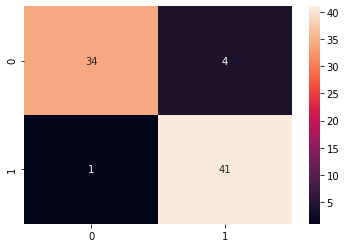

In [35]:
evaluate(y_test, mnb.predict(X_test), 'MNB')

# SVM

In [20]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC()

Acurracy: 88.75%
Recall: 88.10%
Precision: 90.24%
F1 Score: 89.16%


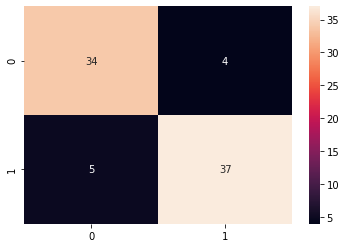

In [36]:
evaluate(y_test, svc.predict(X_test), 'SVM')

# Feedforward Neural Network

In [30]:
import tensorflow as tf
import numpy as np

ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(1024, activation='relu', input_shape=(vectorized_datasets.shape[1],)))
ann.add(tf.keras.layers.Dense(512, activation='relu'))
ann.add(tf.keras.layers.Dense(256, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))
ann.compile(optimizer= tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(np.array(X_train), np.array(y_train), epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 12ms/step - loss: 0.5330 - accuracy: 0.8006
Epoch 2/10
10/10 [==============================] - 0s 12ms/step - loss: 0.3692 - accuracy: 0.8447
Epoch 3/10
10/10 [==============================] - 0s 12ms/step - loss: 0.2248 - accuracy: 0.8937
Epoch 4/10
10/10 [==============================] - 0s 12ms/step - loss: 0.1207 - accuracy: 0.9443
Epoch 5/10
10/10 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 12ms/step - loss: 3.0631e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 11ms/step - loss: 1.5184e-04 - accuracy: 1.0000


Acurracy: 97.50%
Recall: 100.00%
Precision: 95.45%
F1 Score: 97.67%


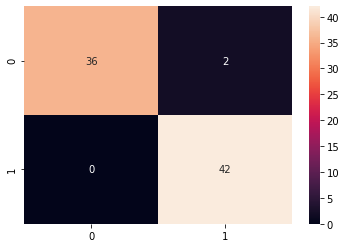

In [37]:
evaluate(y_test, ann.predict_classes(np.array(X_test)), 'FNN')

In [38]:
scores

,Model,Accuracy,Precision,Recall,F1 Score
0,MNB,0.9375,0.911111,0.976190,0.942529
1,SVM,0.8875,0.902439,0.880952,0.891566
2,FNN,0.9750,0.954545,1.000000,0.976744


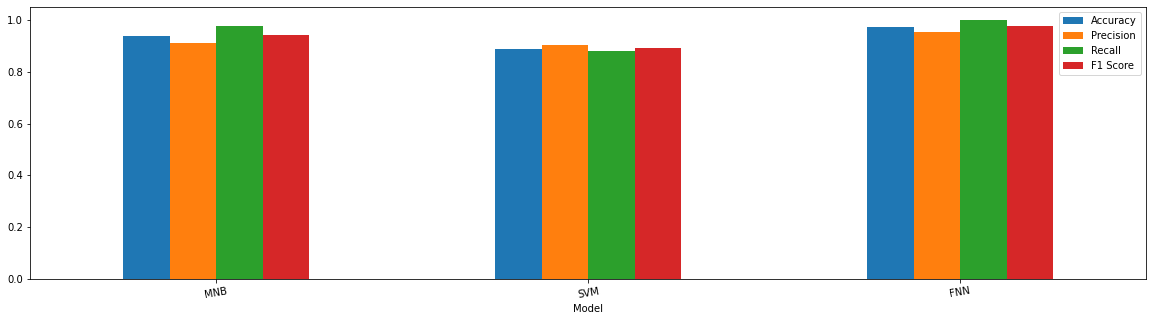

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

scores.plot.bar(rot=10, figsize=(20,5), x = 'Model')